# 한글 텍스트 분석

먼저 Raw Data(.csv,.xls 등)을 읽어오기 위한 부분을 구현한다.
여기서는 Pandas DataFrame에 RawData를 읽어오도록 선언하고 출력해본다.

In [1]:
from collections import Counter
from konlpy.tag import Hannanum
import pandas as pd

data = pd.read_csv('livetalk.csv')

In [9]:
texts = data['BLTTHG_CNTNT']

type(texts)

pandas.core.series.Series

In [12]:
import math

def dot_product(v1,v2):
    return sum(map(lambda x:x[0]*x[1],zip(v1,v2)))

def cosine_measure(v1,v2):
    prod = dot_product(v1,v2)
    len1 = math.sqrt(dot_product(v1,v1))
    len2 = math.sqrt(dot_product(v2,v2))
    return prod / (len1*len2)

In [14]:
documents = [
    ['왕자','가','공주','를','좋아한다'],
    ['공주','가','왕자','를','좋아한다'],
    ['시녀','가','왕자','를','싫어한다'],
    ['공주','가','시녀','를','싫어한다'],
    ['시녀','가','왕자','를','독살한다'],
    ['시녀','가','공주','를','독살한다']
]

words = set(sum(documents,[]))
print(words)

{'시녀', '싫어한다', '를', '독살한다', '가', '좋아한다', '공주', '왕자'}


In [3]:
def read_data(filename):
    with open(filename,'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

train_data = read_data('./rating_data/ratings_train.txt')
test_data = read_data('./rating_data/ratings_test.txt')

print(len(train_data))
print(len(train_data[0]))

print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [4]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc,norm=True,stem=True)]

train_docs = [(tokenize(row[1]),row[2]) for row in train_data]
test_docs = [(tokenize(row[1]),row[2]) for row in test_data]

from pprint import pprint
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증/Noun',
  '나다/Verb',
  '목소리/Noun'],
 '0')


In [9]:
import nltk

tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

text = nltk.Text(tokens, name='NMSC')
print(text)
print(len(text.tokens))
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

2194536
<Text: NMSC>
2194536
48765
[('./Punctuation', 68630),
 ('영화/Noun', 51365),
 ('하다/Verb', 50281),
 ('이/Josa', 39123),
 ('보다/Verb', 34764),
 ('의/Josa', 30480),
 ('../Punctuation', 29055),
 ('에/Josa', 27108),
 ('가/Josa', 26696),
 ('을/Josa', 23481)]


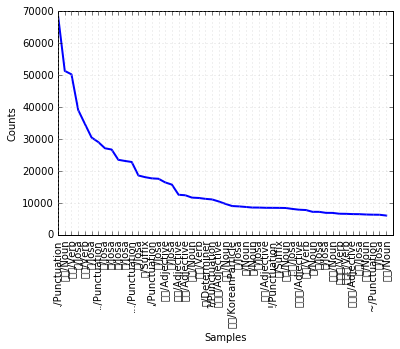

In [11]:
%matplotlib inline
# from matplotlib import pyplot
text.plot(50)

In [14]:
text.concordance('더빙')

No matches


In [17]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]
selected_words

['./Punctuation',
 '영화/Noun',
 '하다/Verb',
 '이/Josa',
 '보다/Verb',
 '의/Josa',
 '../Punctuation',
 '에/Josa',
 '가/Josa',
 '을/Josa',
 '도/Josa',
 '.../Punctuation',
 '은/Josa',
 '들/Suffix',
 ',/Punctuation',
 '는/Josa',
 '없다/Adjective',
 '를/Josa',
 '있다/Adjective',
 '좋다/Adjective',
 '너무/Noun',
 '되다/Verb',
 '이/Determiner',
 '?/Punctuation',
 '재밌다/Adjective',
 '정말/Noun',
 'ㅋㅋ/KoreanParticle',
 '다/Josa',
 '것/Noun',
 '이/Noun',
 '한/Josa',
 '같다/Adjective',
 '!/Punctuation',
 '적/Suffix',
 '진짜/Noun',
 '으로/Josa',
 '아니다/Adjective',
 '않다/Verb',
 '점/Noun',
 '로/Josa',
 '만/Josa',
 '연기/Noun',
 '나오다/Verb',
 '만들다/Verb',
 '이렇다/Adjective',
 '에서/Josa',
 '평점/Noun',
 '~/Punctuation',
 '과/Josa',
 '최고/Noun',
 '이다/Verb',
 '1/Number',
 '왜/Noun',
 '스토리/Noun',
 '생각/Noun',
 '인/Josa',
 '..../Punctuation',
 '드라마/Noun',
 '이다/Josa',
 '감동/Noun',
 '사람/Noun',
 '보고/Noun',
 '말/Noun',
 '아깝다/Adjective',
 '더/Noun',
 '다/Adverb',
 '배우/Noun',
 '내/Noun',
 '고/Josa',
 '안/Noun',
 '때/Noun',
 '재미있다/Adjective',
 '감독/Noun',
 '그냥/Noun',
 '한/Deter

In [2]:
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

train_docs = train_docs[:100]

train_xy = [(term_exists(d),c) for d,c in train_docs]
test_xy = [(term_exists(d),c) for d,c in test_docs]

NameError: name 'train_docs' is not defined